In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
df = pd.read_csv("student.csv")
print(df.head)

<bound method NDFrame.head of        Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0               0  female         NaN   bachelor's degree      standard   
1               1  female     group C        some college      standard   
2               2  female     group B     master's degree      standard   
3               3    male     group A  associate's degree  free/reduced   
4               4    male     group C        some college      standard   
...           ...     ...         ...                 ...           ...   
30636         816  female     group D         high school      standard   
30637         890    male     group E         high school      standard   
30638         911  female         NaN         high school  free/reduced   
30639         934  female     group D  associate's degree      standard   
30640         960    male     group B        some college      standard   

        TestPrep ParentMaritalStatus PracticeSport IsFirstChild  NrSi

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [27]:
wk = df["WklyStudyHours"]
print(wk.head)

<bound method NDFrame.head of 0           < 5
1        5 - 10
2           < 5
3        5 - 10
4        5 - 10
          ...  
30636    5 - 10
30637    5 - 10
30638    5 - 10
30639    5 - 10
30640    5 - 10
Name: WklyStudyHours, Length: 30641, dtype: object>


In [4]:
df.isnull().sum()


Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

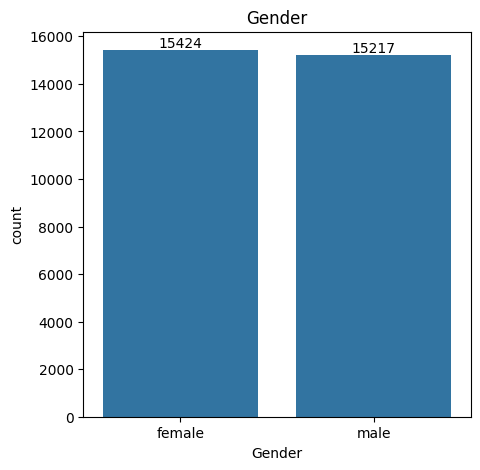

In [22]:
plt.figure(figsize=(5,5))
ax= sns.countplot(data=df, x="Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender")
plt.show()

# from the above chart we have anlyze that:
# the number of female was gerater than to the number of males

In [14]:
gb = df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean",	"WritingScore":"mean"}) 
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


<function matplotlib.pyplot.show(close=None, block=None)>

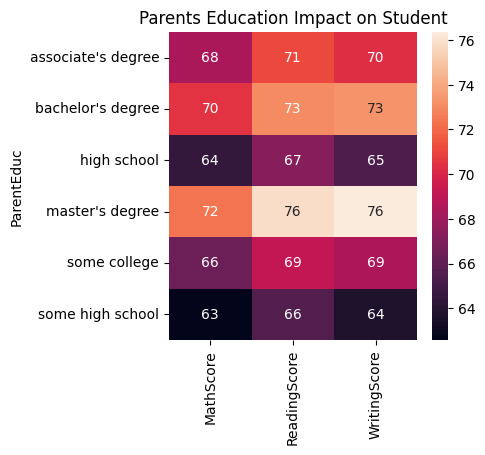

In [23]:
plt.figure(figsize=(4,4))
sns.heatmap(gb, annot = True)
plt.title("Parents Education Impact on Student")
plt.show

In [16]:
mr = df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean",	"WritingScore":"mean"}) 
print(mr)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


<function matplotlib.pyplot.show(close=None, block=None)>

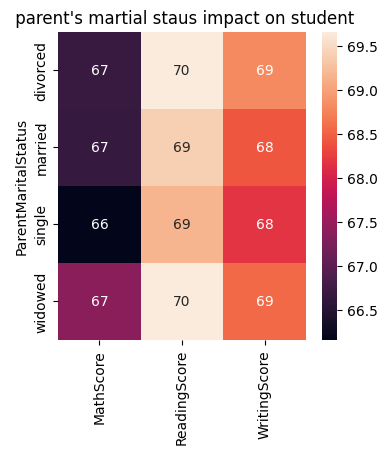

In [20]:
plt.figure(figsize=(4,4))
sns.heatmap(mr, annot = True)
plt.title(" parent's martial staus impact on student")
plt.show

# from the above chart we have coculated that is no/neglagible impact on the student's 
# score due to the their parent's marital status 

In [28]:
wk = df.groupby("WklyStudyHours").agg({"MathScore":"mean","ReadingScore":"mean",	"WritingScore":"mean"}) 
print(wk)

                MathScore  ReadingScore  WritingScore
WklyStudyHours                                       
5 - 10          66.870491     69.660532     68.636280
< 5             64.580359     68.176135     67.090192
> 10            68.696655     70.365436     69.777778


<function matplotlib.pyplot.show(close=None, block=None)>

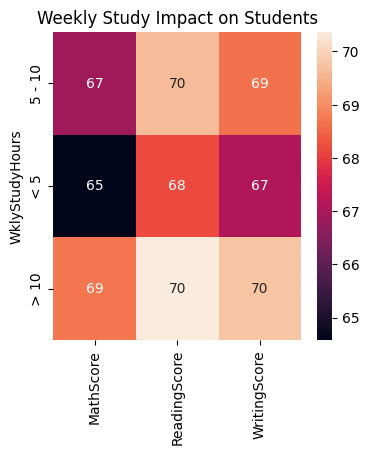

In [50]:
plt.figure(figsize=(4,4))
sns.heatmap(wk, annot = True)
plt.title("Weekly Study Impact on Students")
plt.show

# from the above chart we have coculated that is huze impact on students. 

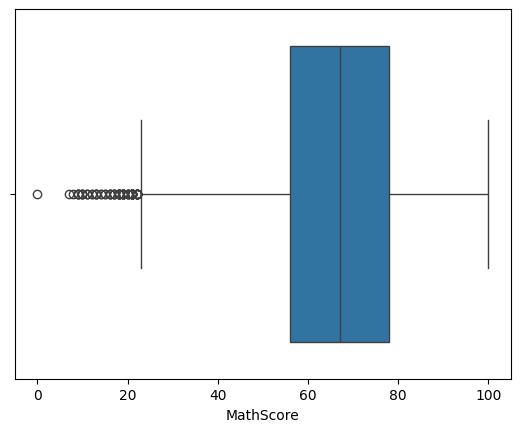

In [30]:
sns.boxplot(data =df, x = "MathScore")
plt.show()

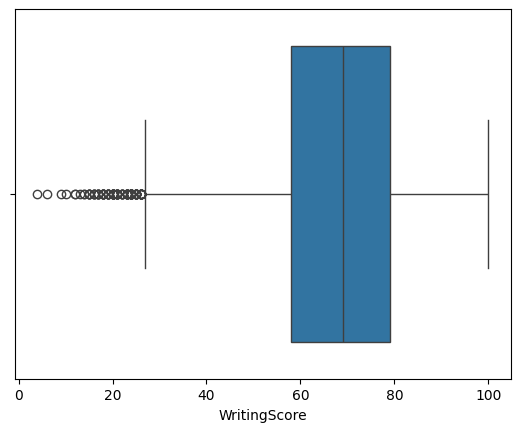

In [31]:
sns.boxplot(data =df, x = "WritingScore")
plt.show()

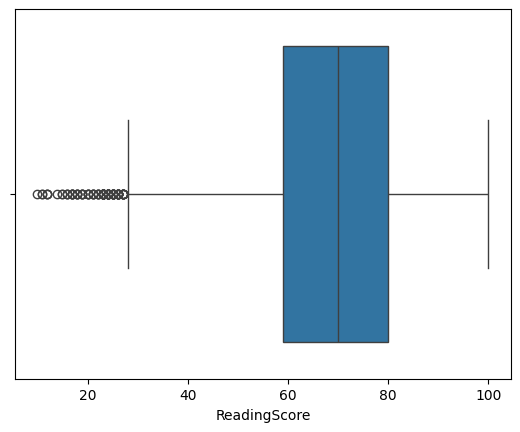

In [32]:
sns.boxplot(data =df, x = "ReadingScore")
plt.show()

#  Acoording  to above chart compared to reading and writing math was difficult for students 

In [33]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


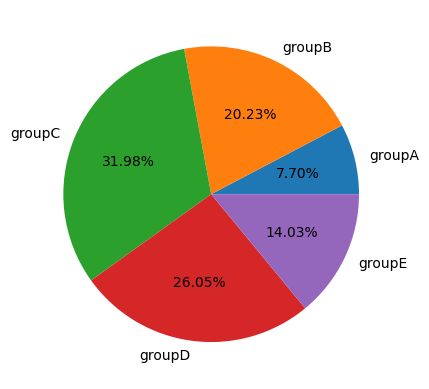

In [46]:
groupA = df.loc[(df['EthnicGroup'] == "group A")].count()
groupB = df.loc[(df['EthnicGroup'] == "group B")].count()
groupC = df.loc[(df['EthnicGroup'] == "group C")].count()
groupD = df.loc[(df['EthnicGroup'] == "group D")].count()
groupE = df.loc[(df['EthnicGroup'] == "group E")].count()

l=['groupA','groupB','groupC','groupD','groupE']
mylist = [groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup']]
plt.pie(mylist , labels = l, autopct = "%1.2f%%")
plt.show()

[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

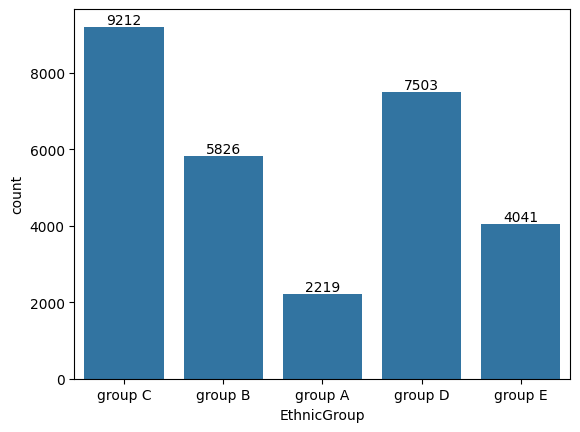

In [49]:
ax =sns.countplot(data = df , x ='EthnicGroup')
ax.bar_label(ax.containers[0])